In [44]:
%pylab
%matplotlib inline
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [4]:
!ls

AMD.csv                         coronaeffect.py
Artigo71.pdf                    montocarlo.py
BrexitVoteGSPC.csv              snp.py
D.csv                           snp5.csv
DarwinCollege.pdf               snp500.csv
MDB.csv                         weibull.py
black swan event analysis.ipynb


In [64]:
df = pd.read_csv("snp500.csv")

In [65]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1930-03-21,24.290001,24.290001,24.290001,24.290001,24.290001,0
1,1930-03-24,24.280001,24.280001,24.280001,24.280001,24.280001,0
2,1930-03-25,24.250000,24.250000,24.250000,24.250000,24.250000,0
3,1930-03-26,24.620001,24.620001,24.620001,24.620001,24.620001,0
4,1930-03-27,24.570000,24.570000,24.570000,24.570000,24.570000,0


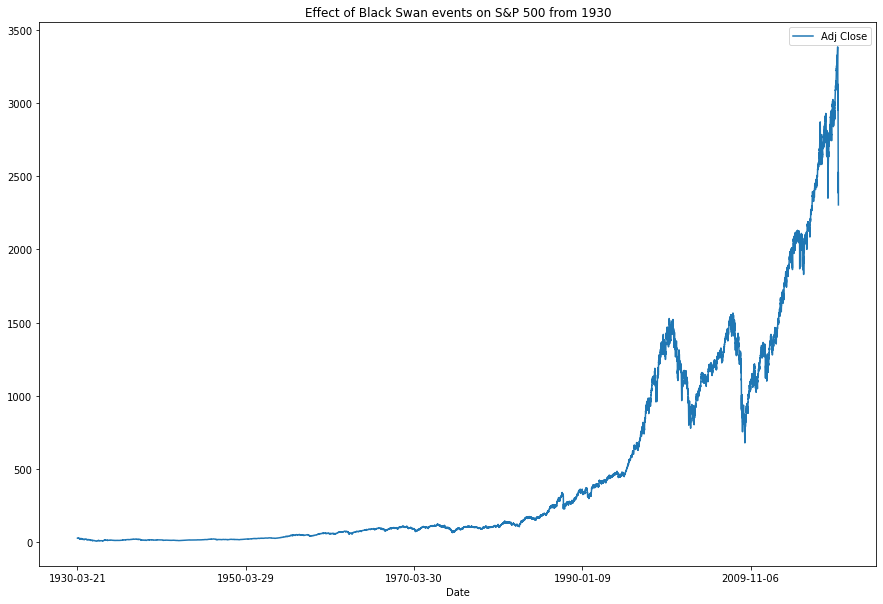

In [72]:
df.plot(x='Date',y='Adj Close',figsize=(15,10),title='Effect of Black Swan events on S&P 500 from 1930')

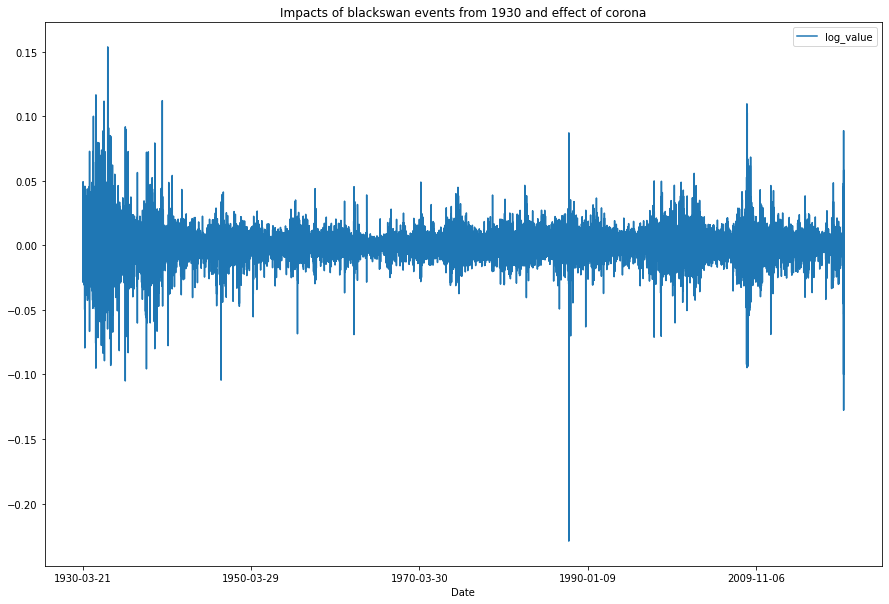

In [73]:
df['log_value'] = np.log(1 + df['Adj Close'].pct_change()) # percentage change 
df.plot(x='Date',y='log_value',figsize=(15,10),title='Impacts of blackswan events from 1930 and effect of corona')

In [5]:
from dateutil.parser import parse 
df_5 = pd.read_csv("snp5.csv",parse_dates=['Date'], index_col='Date')

In [6]:
df_5.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-23,2107.989990,2114.860107,2104.419922,2104.419922,2104.419922,3267960000
2015-03-24,2103.939941,2107.629883,2091.500000,2091.500000,2091.500000,3189820000
2015-03-25,2093.100098,2097.429932,2061.050049,2061.050049,2061.050049,3521140000
2015-03-26,2059.939941,2067.149902,2045.500000,2056.149902,2056.149902,3510670000
2015-03-27,2055.780029,2062.830078,2052.959961,2061.020020,2061.020020,3008550000


In [7]:
df_s = df_5['Adj Close']

In [8]:
df_s.head()

Date
2015-03-23    2104.419922
2015-03-24    2091.500000
2015-03-25    2061.050049
2015-03-26    2056.149902
2015-03-27    2061.020020
Name: Adj Close, dtype: float64

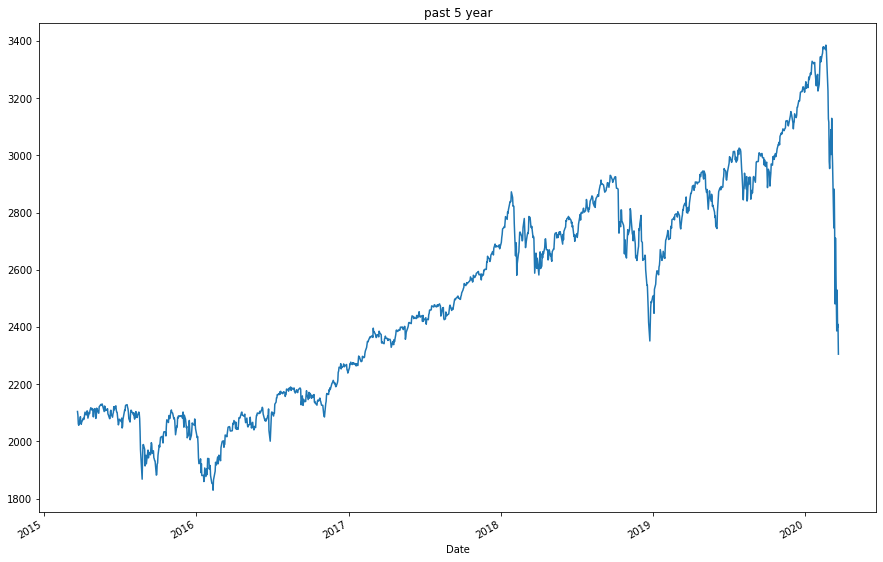

In [9]:
df_s.plot(figsize=(15,10),title='past 5 year')

In [36]:
decomposition = seasonal_decompose(df_s, model='multiplicative',period=365)

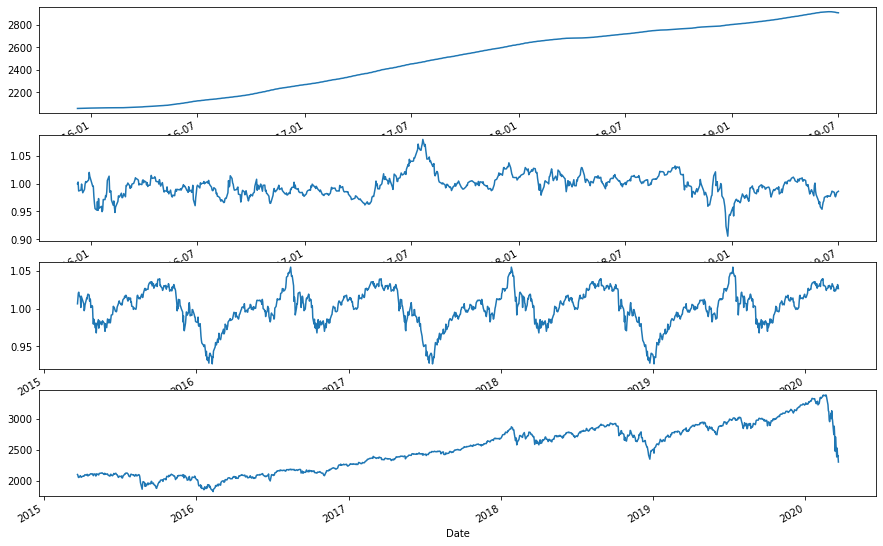

In [50]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))

decomposition.trend.plot(ax=ax1)
decomposition.resid.plot(ax=ax2)
decomposition.seasonal.plot(ax=ax3)
decomposition.observed.plot(ax=ax4)

In [38]:
df_s.index

DatetimeIndex(['2015-03-23', '2015-03-24', '2015-03-25', '2015-03-26',
               '2015-03-27', '2015-03-30', '2015-03-31', '2015-04-01',
               '2015-04-02', '2015-04-06',
               ...
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20'],
              dtype='datetime64[ns]', name='Date', length=1259, freq=None)

In [51]:
from statsmodels.tsa.stattools import acf, pacf